# HTDMA notes

This file contains the important steps required for HTDMA

### The aim:
Kappa - a measure of a particles hygroscopicity, i.e. a particle's affinity for water.

# DDD TODO

---
## DMA

Here's a pretty good overview of how a DMA works

http://www.cas.manchester.ac.uk/restools/instruments/aerosol/differential/

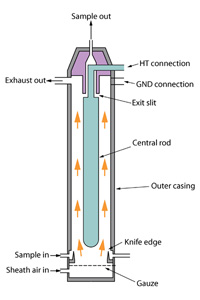

In [14]:
import matplotlib.pyplot as plt
from IPython import display
from matplotlib.ticker import FormatStrFormatter

display.Image("http://www.cas.manchester.ac.uk/images/photos/instruments/DMA.jpg")



A DMA is founded in a certain physical property known as *electrical mobility*. From Wikipedia:
>Electrical mobility is the ability of charged particles (such as electrons or protons) to move through a medium in response to an electric field that is pulling them.

A DMA separates (sorts, classifies, etc.) particles by their *electrical mobility*, denoted as $Z_p$ in the literature. **We will try to stick with the same variable names in Python!**

Electrical mobility, $Z_p$, is directly related to particle size, $d_p$; however, the transfer function to get $d_p$ from $Z_p$ is *not* straightforward, and has many, many variables at play.


### Important variables

The following is a list of the variables that the user will need to enter per experiment. It's quite possible that many of these will simply come from the file read in, and that we simply need to display the parameters for confirmation purposes.

* $Z_p^\star$ - center of electrical mobility - $cm^2/(V*sec)$
    * (area per volt*time)
* $\Delta Z_p$ - The full width half height of the center of mobility. Basically, the width of the distribution at half of its height.

Important variables needed to calculate electrical mobility

* $Q_{sh}$ - The clean sheath air inlet flow rate (lpm)
    * a.k.a. $Q_c$ in literature
* $Q_{aIn}$  - Aerosol inlet flow rate. (lpm)
    * DDD calls this the **polydisperse** flow in
    * a.k.a. $Q_a$ in literature
* $V$ - Voltage (volts)
    * This can range from 1-10000. Any range outside this should be flagged

If we are running in **asymmetric** mode, then the user needs to enter these as well:
* $Q_{excess}$ - Excess flow rate out. (lpm)
    * In symmetric mode, this is the same as $Q_{sh}$.
    * If asymmetric, then this needs to be specified.
    * a.k.a. $Q_e$ in literature
* $Q_{aOut}$ - The aerosol sampling outlet flow rate. (lpm)
    * DDD calls this monodisperse flow out.
    * Again, in symmetric mode, this is the same as $Q_{aIn}$
    * a.k.a $Q_s$ in literature

DMA setup variables
* $r_{in}$ - inner radius of the DMA charge rod (aka $r_1$) (cm)
* $r_{out}$ - outer radius of the DMA housing (aka $r_2$) (cm)
* $L$ - length of the DMA classification region (cm)

Constraints / error checking

* If symmetric, then $Q_{aIn} == Q_{aOut}$ and $Q_{sh} == Q_{excess}$
* In all modes, $Q_{sh} + Q_{aIn} == Q_{excess} + Q_{aOut}$
* V >= 1 && V <= 10000


# Data File Format

In this section, I characterize the format of the data that is output by TSI's software

### Run Variables

Below are the variables that are output for each run. These never change between runs, and thus evey scan in a run will have these same settings.


```
(line 1) Classifier Model	3080
* DMA Model	3081
* DMA Inner Radius(cm)	0.00937
* DMA Outer Radius(cm)	0.01961
* DMA Characteristic Length(cm)	0.44369
* CPC Model	3776 Low Flow
* Reference Gas Viscosity (Pa*s)	1.83245e-005
* Reference Mean Free Path (m)	6.73e-008
* Reference Gas Temperature (K)	296.15
* Reference Gas Pressure (kPa)	101.3
* Channels/Decade	64
- Multiple Charge Correction	TRUE
- Nanoparticle Aggregate Mobility Analysis	FALSE
- Diffusion Correction	TRUE
* Gas Density	0.0012
- Units	dw/dlogDp
```

### Scan data format

The raw datafile has many individual scans per run. Below are a couple of scans taken from a typical run

```
Weight	Number
Sample #	1	2	...
Date	06/07/21	06/07/21 ...
Start Time	14:16:57	14:19:16	...
Diameter Midpoint
8.20	1.38628e+006	359136	...
8.51	931386	133055	...
8.82	418658	867770	...
9.14	582892	932377	...
9.47	872760	1.10854e+006	...
9.82	635978	854641	...
 10.2	830346	875384 ...
 10.6	839626	933159	...
 10.9	732202	781613	...
 11.3	1.14583e+006	895912	...
 11.8	932533	934757	...
 12.2	876492	797449	...
 12.6	1.24262e+006	1.12856e+006	...
 13.1	1.21498e+006	1.1466e+006	1.31504e+006	...
 13.6	1.15899e+006	1.11361e+006	...
 14.1	1.30868e+006	1.18824e+006	...
 14.6	1.06479e+006	1.17743e+006	...
 15.1	1.24293e+006	1.48843e+006	...
 15.7	1.57356e+006	1.37312e+006	...
 16.3	1.39319e+006	1.55124e+006	...
 16.8	1.49151e+006	1.51485e+006	...
 17.5	1.41537e+006	1.75778e+006	...
 18.1	1.54814e+006	1.6494e+006	...
 18.8	1.69995e+006	1.63179e+006	...
 19.5	1.70604e+006	1.76166e+006	...
 20.2	1.82198e+006	1.83698e+006	...
 20.9	1.90822e+006	1.84821e+006	...
 21.7	1.80402e+006	1.78119e+006	...
 22.5	1.87402e+006	2.19793e+006	...
 23.3	1.89541e+006	2.10815e+006	...
 24.1	2.10639e+006	2.22377e+006	...
 25.0	2.17907e+006	2.12368e+006	...
 ...
310.6	4736.35	6841.28	...
322.0	4751.55	8021.07	...
333.8	36664.5	31891.3	...
```

### Additional variables per scan

These variables are stored for each scan, after all the conc data above.

```
- Scan Up Time(s)	120
- Retrace Time(s)	15
- Down Scan First	FALSE
- Scans Per Sample	1
- Impactor Type(cm)	0.071
* Sheath Flow(lpm)	7.99998
* Aerosol Flow(lpm)	0.3
* CPC Inlet Flow(lpm)	0.3
* CPC Sample Flow(lpm)	0.05
* Low Voltage	10.0272
* High Voltage	9530.41
* Lower Size(nm)	8.05842
* Upper Size(nm)	339.821
- Density(g/cc)	1
Title
Status Flag	Normal Scan
- td(s)	4.3
- tf(s)	2.99021
- D50(nm)	1415.69
- Median(nm)	33.4426
- Mean(nm)	39.529
- Geo. Mean(nm)	32.317
- Mode(nm)	35.8664
- Geo. Std. Dev.	1.90518
* Total Concentration(#/cm�)	1.85526e+006  CALL "Number Conc (#/cm^3)
Comment
```

In [15]:
# Experiment setup. Default will be symmetric flow rates
Q_sh = 10.0             # Sheath in flow rate
Q_aIn = 1.0             # Aerosol inlet flow (Polydisperse)
V = 10000.0              # Volts (allow 1-10000, anything else should be flagged)

IS_SYMMETRIC = True

# If user chooses asymmetric flows then these two need to appear as well, otherwise, they are matched as indicated:
if IS_SYMMETRIC:
    Q_excess = Q_sh
    Q_aOut = Q_aIn
else:
    # User will need to enter these if in asymmetric mode
    Q_excess = 10.0
    Q_aOut = 1.0

In [16]:
def validate_setup():
    """
    This function will validate all user entries before any analysis
    is completed.

    :raises: ValueError if any value is not correct

    :return:
    """
    if IS_SYMMETRIC:
        if Q_aIn != Q_aOut or Q_sh != Q_excess:
            raise ValueError("Symmetric flows not matching!")
    if Q_sh + Q_aIn != Q_excess + Q_aOut:
        raise ValueError("Mismatched inlet and outlet flows!")
    if V < 1 or V > 10000:
        raise ValueError("Voltage setting out of range")

validate_setup()

In [17]:
# Advanced settings only. DMA parameters need to be specified.
# These are obtained from Table 1 in Collins et al (2004) - "The Scanning DMA Transfer Function.
DMA_Length_cm = 44.44       # L in paper
Radius_inner_cm = 0.937     # r1 in paper
Radius_outer_cm = 1.958     # r2 in paper

# Center of mobility (particle size)

### Unit conversions

It's important to note that all units throughout are working in "cgs" i.e. cm/grams/sec

* Flows need to be in cm^3/sec. This conversion is lpm*1000/60

## Equations

These equations are from Stolzenburg and McMurry (2008):

### $Z_p^* = \frac{Q_{sh} + Q_{excess}}{4 \pi \Delta \phi}$

### $\Delta Z_p = Z_p^* \frac{Q_{aIn} + Q_{aOut}}{Q_{sh} + Q_{excess}}$

$\Delta \phi$ is defined as the change in the electrical flux from the aerosol inlet to the outlet for axial flow DMA:

### $\Delta \phi = \frac{LV}{ln(\frac{r_2}{r_1})}$

These values are defined by the actual physical characteristics of the DMA itself. The only real user-controlled parameter is the voltage, $V$.

---
### $Z_p$ to $d_p$

The electrical mobility, $Zp$ is related to particle diameter, $d_p$ by using Stokes' law, and is defined as follows:

## $Z_p = \frac{neC_c}{3 \pi \mu d_p}$

Solving for $d_p$ is very straightforward:

## $d_p = \frac{neC_c}{3 \pi \mu Z_p}$

where:
* $n$ - number of elementary charge units
  * The default is 1.
  * 2 for two peaks.
  * USER ENTRY - depends on experiment
* $e$ - elementary unit of charge ($1.602 \times 10^{-19}$ C)
  *  C is a unit - Coulomb, which is always specified in M-kg-sec world. We work in cm-g-sec, so this value must be multiplied by $10^5$
  * This is a constant
* $C_c$ - Cunningham slip correction factor
  * _See below!_ This needs a separate explanation.
* $\mu$ - gas viscosity
  * 0.00183 poise, or just p
  * units = g/(cm * sec)

This gives a result for $d_p$ in cm. So, must multiply by another $10^7$ to get nanometers.

### Cunningham Slip Correction:

The Cunningham slip correction factor is defined as :

### $C_c = 1 + \frac{\lambda}{d_p}[2.34 + 1.05 exp(-0.39 * \frac{d_p}{\lambda})]$

where:
* $\lambda$ - the *mean free path* of a gas molecule.
  * It is $0.066$ $\mu m$, or $6.64 e^{-6}$ cm.
  * This value is dependent on temperature of 20 C and 1 atm and thus could be modeled more effectively (see below).
* $d_p$ - particle diameter

### Algorithm to find $d_p$ from $Z_p$

The process of finding $d_p$ will be iterative. Choosing a *reasonable* first value at $C_c$ and then using that to solve for a first guess at $d_p$, then using that to solve for a better estimate for $d_p$, and so on until convergence.

## Other equations

### Gas viscosity

http://hyperphysics.phy-astr.gsu.edu/hbase/Kinetic/visgas.html

Gas viscosity can be modeled by Sutherland's formula:

## $\mu = \mu_0 (\frac{a}{b})[\frac{T}{T_0}]^{1.5}$

where:

* $\mu$ = viscosity in centiPoise at temp $T$
* $\mu_0$ = reference viscosity in centiPoise at reference temp $T_0$
* $a = 0.555 T_0 + C$
* $b = 0.555 T + C$
* $T_0$ is the reference temp in Rankine
* $T$ is the temp in Rankine
* $C$ = Sutherland's Constant
  * $C = 120$ for standard air at $T_0 = 524.07$ and $\mu_0 = 0.01827$ centiPoise

### Mean free path

* https://goldbook.iupac.org/terms/view/M03778
* https://science.widener.edu/~svanbram/chem332/pdf/menfpath.pdf
* * https://www.pfeiffer-vacuum.com/en/know-how/introduction-to-vacuum-technology/fundamentals/mean-free-path/

>This one is probably the toughest one to deal with. Just stick with the value that is read in from the TSI output data file.

For a gas molecule:

## $\lambda = \frac{1}{\sqrt{2} n \pi d^2}$

where, following the standard ideal gas law, we can see that

$n = \frac{N}{V} = \frac{p}{k_B T}$

Putting it all together:

This is the distance that a molecule travels between collisions

## $\lambda = \frac{k_B T}{\sqrt{2}  \pi  p  d^2}$

where:

* $k_B$ - Boltzmann constant = $1.380649×10^{-23}$ Joule/degK
* $T$ - Temperature (Kelvin)
* $p$ - Pressure (pascals) (1 atm = 101325 pa = 101.325 kPa = 1013.25 mbar)
* $d$ - molecular diameter

This is far more than what I think we need to model. Most of the time, just use what is given in the TSI file

#### Constants for Mean Free Path

At 1 atm, the mean free path = 68 nm

### Celsius to Rankine

$T_R = T_C + 273.15 * 9/5$

### Fahrenheit to Rankine

$T_R = T_F + 459.67$

In [18]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import math

import sys
sys.path.insert(1,'../model')
from model import formulas

In [19]:

(Zp, Zp_fwhh) = formulas.compute_Zp(Q_sh=Q_sh,
                                    Q_aIn=Q_aIn,
                                    Q_excess=Q_excess,
                                    Q_aOut=Q_aOut,
                                    V=V)
print("Zp = {}, Zp_fwhh = {}".format(Zp,Zp_fwhh))

Zp = 4.399058031926418e-05, Zp_fwhh = 4.399058031926418e-06


In [20]:
Cs = 2  # Initial value for Cs
dp = formulas.Zp_to_Dp(Zp,Cs=2)
print("Dp (init value of Cs = 2) = {}".format(dp))


Dp (init value of Cs = 2) = 321.7245477688485


In [9]:
# Get my points:

# Compute the bottom points for the triangle. NOTE - electrical mobility
# and dp have an inverse relationship. Thus, we are flipping these (i.e.
# adding to the center to get the left, vice versa for right)
dp_left_bottom = formulas.Zp_to_Dp(Zp+Zp_fwhh)
dp_right_bottom = formulas.Zp_to_Dp(Zp-Zp_fwhh)

print("left: {:.3f}".format(dp_left_bottom))
print("center: {:.3f}".format(dp))
print("right: {:.3f}".format(dp_right_bottom))

Cs (pass 1) = 1.436892473250781
Dp (pass 1) = 274.7603883524792
Cs (pass 2) = 1.6328716213648953
Dp (pass 2) = 312.2352223064768
Cs (pass 3) = 1.547766163066854
Dp (pass 3) = 295.96148630451756
Cs (pass 4) = 1.5818230642378919
Dp (pass 4) = 302.47379503049086
Cs (pass 5) = 1.5677113074829438
Dp (pass 5) = 299.7753664156111
Cs (pass 6) = 1.573476997830519
Dp (pass 6) = 300.87787293472167
Cs (pass 7) = 1.5711075724997805
Dp (pass 7) = 300.4247950349029
Cs (pass 8) = 1.5720789836554225
Dp (pass 8) = 300.6105467952766
Cs (pass 1) = 1.3508844794422452
Dp (pass 1) = 315.71719774957756
Cs (pass 2) = 1.5409789779943686
Dp (pass 2) = 360.14446248154565
Cs (pass 3) = 1.4669514755998483
Dp (pass 3) = 342.84338606230375
Cs (pass 4) = 1.4932691131112077
Dp (pass 4) = 348.99411981705543
Cs (pass 5) = 1.4835830646079287
Dp (pass 5) = 346.73037918100607
Cs (pass 6) = 1.4871039005519335
Dp (pass 6) = 347.5532389257832
Cs (pass 7) = 1.4858182412471186
Dp (pass 7) = 347.25276559948924
Cs (pass 8) = 1.486

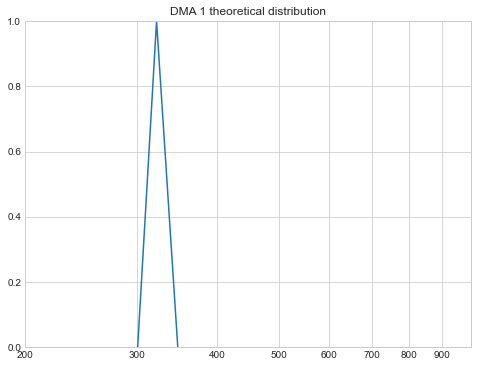

In [101]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
plt.style.use('seaborn-whitegrid')

x = [dp_left_bottom,dp,dp_right_bottom]
y = [0, 1, 0]
# TODO - Fix the center height

ax.set_xscale('log')
ax.set_xlim(200,1000)
ax.set_xticks(np.arange(200,1000,100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# TODO - Set "Dp" for x axis label
ax.set_ylim(0,1)

plt.title("DMA 1 theoretical distribution")
plt.plot(x,y)
plt.grid(True)

---
# Using the DMA_1 class